# Cutting Planes Method (Kelley Method)

In [1]:
import pynso.cuttingPlane as cp
import pynso.proxBundle as pb
import pyuotools.tools as tl
import numpy as np
import matplotlib.pyplot as plt

In [2]:
import functions_lista1 as cc

### minimzing the absulute  value function

In [3]:
x0 = np.array([8])
result = cp.minimize(x0, fg=cc.f1)

Set parameter Username
Set parameter LicenseID to value 2649032
Academic license - for non-commercial use only - expires 2026-04-08
Set parameter LogToConsole to value 0
Freeing default Gurobi environment
No models currently loaded
None
disposing


In [4]:
result

fval = 0.0
nIter = 2
status = 0
time = 0.07020378112792969
optimalityMeasure = 0.0

### solving f4 funcgtion

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


<AxesSubplot: >

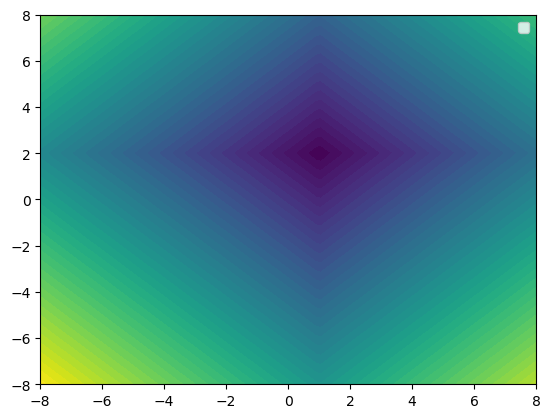

In [5]:
tl.plot(fg=cc.f4, x=(-8,8))

In [6]:
x0 = np.array([5.0,10.0])
result = pb.minimize(x0, fg=cc.f4,xLog='x.log')

Set parameter Username
Set parameter LicenseID to value 2649032
Academic license - for non-commercial use only - expires 2026-04-08
Set parameter LogToConsole to value 0
Set parameter LogToConsole to value 0
Set parameter LogToConsole to value 0
Set parameter LogToConsole to value 0
Set parameter LogToConsole to value 0
Set parameter LogToConsole to value 0
Set parameter LogToConsole to value 0
Set parameter LogToConsole to value 0
Set parameter LogToConsole to value 0
Set parameter LogToConsole to value 0


In [7]:
result

fval = 0.49999999930841743
nIter = 10
status = 0
time = 0.08679676055908203
optimalityMeasure = 0.5000000000429471

In [8]:
result.x

array([1. , 2.5])

<AxesSubplot: >

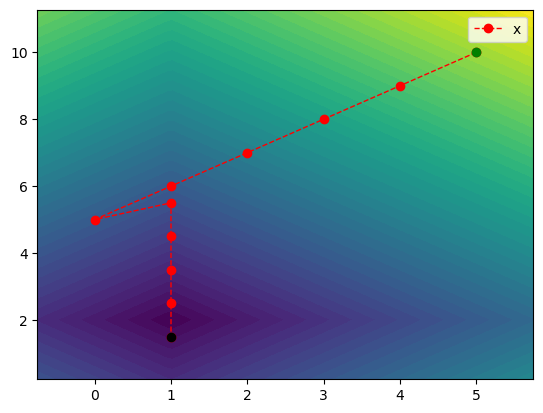

In [9]:
tl.plot(fg=cc.f4, files=['x.log'])

In [10]:
x0 = np.array([1.0,2.0])
result = pb.minimize(x0, fg=cc.f4,xLog='x.log')

Set parameter LogToConsole to value 0
Set parameter LogToConsole to value 0


In [11]:
result

fval = 0.0
nIter = 2
status = 0
time = 0.007504463195800781
optimalityMeasure = 5.590644216331429e-22

In [12]:
import pyuotools.testF.ns as nsf

ModuleNotFoundError: No module named 'pyuotools.testF'

In [13]:
nsf.codes

NameError: name 'nsf' is not defined

In [14]:
nsf.description['chainedlq']

NameError: name 'nsf' is not defined

In [15]:
prob = nsf.problem('chainedlq')

NameError: name 'nsf' is not defined

In [16]:
prob

NameError: name 'prob' is not defined

In [17]:
tl.plot(bb=prob.bb, x=(-4,4),curves=True)

NameError: name 'prob' is not defined

In [18]:
x0 = np.array([5.0,10.0])
result = pb.minimize(x0, bb=prob.bb,xLog='x.log', globalLog='g.log')

NameError: name 'prob' is not defined

In [19]:
result

fval = 0.0
nIter = 2
status = 0
time = 0.007504463195800781
optimalityMeasure = 5.590644216331429e-22

In [20]:
tl.plot(bb=prob.bb, files=['x.log'])

NameError: name 'prob' is not defined

In [21]:
tl.plot(bb=prob.bb, x=(0,1.5),files=['x.log'])

NameError: name 'prob' is not defined

In [ ]:
result.x

array([0.70735734, 0.70685647])

In [ ]:
x0 = result.x
result = pb.minimize(x0, bb=prob.bb,xLog='x.log', globalLog='g.log')

In [ ]:
result

fval = -1.4142135361646297
nIter = 2
status = 0
time = 0.0044879913330078125
optimalityMeasure = 2.0155358668571297e-07

### 'instabcp'

In [ ]:
prob = nsf.problem('instabcp')

In [ ]:
prob

instabcp

 parameters: 
        -  n (interger) dimension of the problem. Default 2.
        - lambda (float) real number. default 0.
        Objective function:
                \[ 
                f(x) =\max\{1, -1+2\lambda + \|x\|\}
                \]
                

{'n': 2, 'lambda': 0}

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


<Axes: >

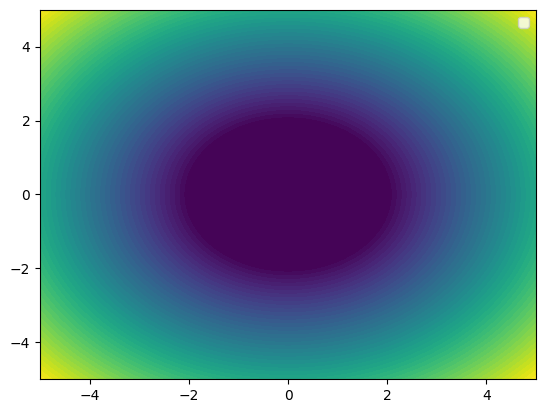

In [ ]:
tl.plot(bb=prob.bb, x=(-5,5))

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


<Axes: >

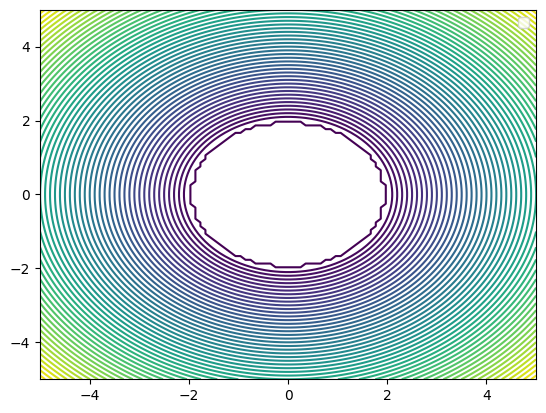

In [ ]:
tl.plot(bb=prob.bb, x=(-5,5),curves=True)

In [ ]:
x0 = np.array([4,7])
result = pb.minimize(x0, bb=prob.bb,xLog='x.log', globalLog='g.log')

In [ ]:
result

fval = 1
nIter = 9
status = 0
time = 0.05613994598388672
optimalityMeasure = 0.0

<Axes: >

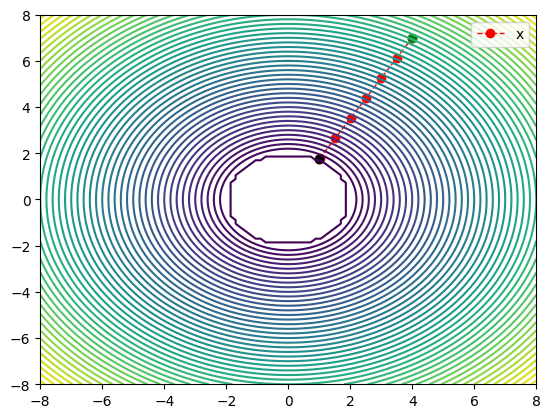

In [ ]:
tl.plot(bb=prob.bb,x=(-8,8),files=['x.log'],curves=True)

### solving f10

In [ ]:
# f(x) = ||Ax-b||_2 + \lambda||x||_1
# not sure
def f10(x, A, b, lamb):
    aux = A.dot(x)-b
    Naux=np.linalg.norm(aux)
    fval =  Naux+ lamb*np.abs(x).sum()
    if np.abs(aux).max()>0:
        grad1 = A.T.dot(aux)/Naux
    else: grad1 = np.zeros_like(x)
        
    grad2 = lamb*np.sign(x)
    return fval, grad1+grad2

In [ ]:
A = 10*np.random.randn(50*100).reshape(50,-1)
xSol = np.random.randn(100)
b = A.dot(xSol)
lamb = 0.001
F10 = lambda x:f10(x,A,b,lamb)

In [ ]:
x0 = np.zeros_like(xSol)
result = pb.minimize(x0, fg=F10,xLog='x10.log', globalLog='g10.log',maxIter=20)

In [ ]:
result

fval = 0.831270347845527
nIter = 20
status = 0
time = 294.49579310417175
optimalityMeasure = 0.8017270284585726

In [ ]:
x0 = np.zeros_like(xSol)
result = pb.minimize(x0, fg=F10, globalLog='g10-2.log',maxIter=150,method='pnew', flavor='spectral1')

In [ ]:
result

fval = 0.11658900573089248
nIter = 150
status = 100
time = 0.16327881813049316
delta = 0.07782379946164511
lastF = 0.08776741825591405


Algorithm State:
muS = 0.970991896621227
muN = 32.97099189662123
globalLogFilePath = g10-2.log
cIter = 150
fLast = 0.08776741825591405
fSerious = 0.11658900573089248
seriousK = 118
delta = 0.07782379946164511
ca0 = 0.07398355835053917
ea = 0.0778163649748959
AproxOptVal = 0.03876520626924738

In [ ]:
x0 = np.zeros_like(xSol)
result = pb.minimize(x0, fg=F10, globalLog='g10-2.log',maxIter=300,method='pnew', flavor='spectral1', bundleMaxSize=80)


Interrupt request received


In [ ]:
result

fval = 0.11024330998269463
nIter = 300
status = 100
time = 0.6917448043823242
delta = 0.07303284408488632
lastF = 0.10254758387757888


Algorithm State:
muS = 0.9704675547167404
muN = 139.97046755471675
globalLogFilePath = g10-2.log
cIter = 300
fLast = 0.10254758387757888
fSerious = 0.11024330998269463
seriousK = 161
delta = 0.07303284408488632
ca0 = 0.0229389744705894
ea = 0.07300333037602803
AproxOptVal = 0.03721046589780831